# Breast Cancer Wisconsin EDA

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [197]:
# Load the data using Pandas to open the Breast-Cancer-Wisconsin csv file.

data = pd.read_csv('data.csv')

In [198]:
# .shape returns a tuple(x, y) where x is the total rows in the dataset and y is the total columns in the dataset.
# In this example we can see that there are a total of 569 rows and 33 columns 

data.shape

(569, 33)

In [199]:
# .describe() when used on a dataframe with numeric values is used to view statistical details such as percentile, mean, std etc
# transpose() swaps the columns and the rows around (same data different view)

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [200]:
# .unique() returns an array of all the unique elements present in the specified column.
# In this example the specified column in the 'diagnosis' column.
# We have two unique values B representing Benign tumors and M representing Malignant tumors, since there are 2, this will be a binary classification

data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [201]:
# We can count how many there are of each class (Benign and Malignant) using value_counts()
# In this example I assign it to the variable 'bargraph' so I can print it out easily and see a visual representation next

bargraph = data.diagnosis.value_counts()
print(bargraph)

B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:>

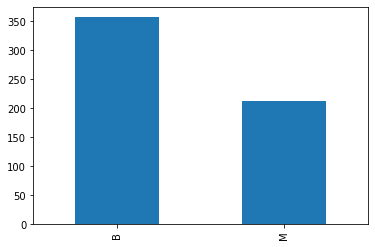

In [202]:
# Visual representation of the 2 classes.
# We can see that there is a total lf 350 Benign tumor instances which is 150 more than the 200 Malignant instances
# Since there are more Benign instances then Malignant instances in the dataset, we know that the classes are unbalanced

bargraph.plot(kind='bar')

## Clean The Data

In [203]:
# We use .drop() to remove columns that are not coorelated to the label (diagnosis) of the breast cancer.
# ID is dropped since it does not offer any insight into whehter an instance of breast cancer is classified as Benign or Malignant.
# *Note* You should not always delete ID number. If the data was collected sequentially, then ID helps to distinguish the time order of the instances.
# This is why it is very important to familiarise yourself with the data. Eg. how it was gathered, what you are classifying etc.

data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

In [204]:
# Using .head() to ensure that columns 'ID' and 'Unnamed 32' have been successfully removed.

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [205]:
# Map the categorical classes to numeric values using .map()

data.diagnosis = data.diagnosis.map({'B':0, 'M':1})

In [206]:
#  .head() to ensure that the classes have been mapped to their numerical number successfully

data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [207]:
# Checking for null or missing values
# isNull() returns any values that are empty or NaN (not a number)
# .sum() gives us the total
# In this example we can see that there is no missing data and no values that are NaN in the datasetdf.

# .info() returns us information about each specific column
data.isnull().sum()
data.info()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Coorelation and multicollinearity in the dataset

In [208]:
# .corr() shows us the level of correlation between the different attributes in the dataset. The closer the value is to 1 the stronger the coorelation is.
# For example, below we can see that radius_mean and perimeter_mean has a 0.997855 value. This is high as it is very close to 1.
# This also makes sense because if you increase the radius, the perimeter is extremely likely to increase.

data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

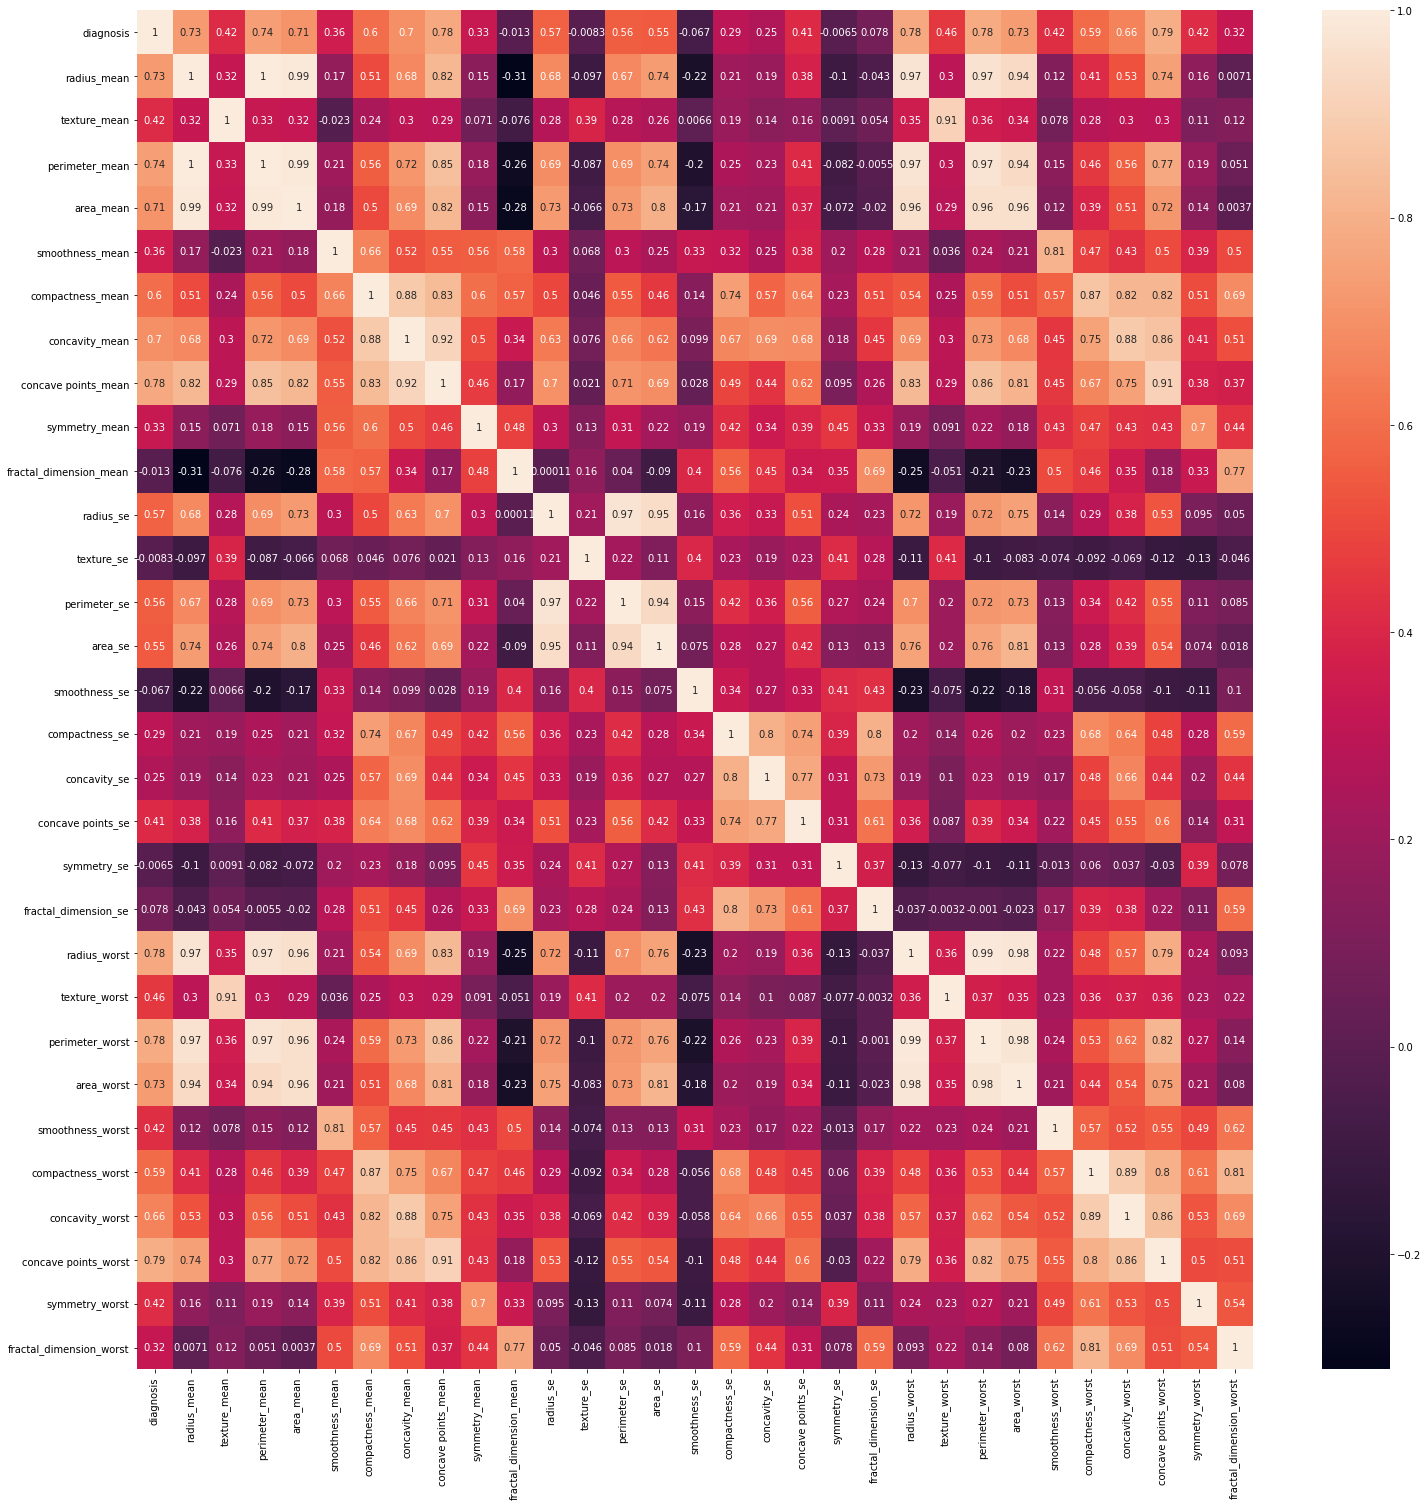

In [209]:
# We can use a heatmap to have a visual represenation of the coorelation values. The brighter the colour, the higher the coorelation is between the two
# attributes.

plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True)

In [210]:
# At first glance, we can see that the dataset seems to have a problem with multicollinearity. This is because we can see that a lot of the values that we have are over 0.9.
# This would make sense since a lot of the attributes in the data are essentially describing the same thing, so we could expect a high amount of coorelation between them.
# I would expect radius_mean, perimeter_mean and area_mean to all be coorelated as they are all describing the physical size of the cell.
# To do a formal check so that  we correctly identify multicollinearity, we can use variance inflation factor (VIF)

# When we have multicollinearity:
# The regression coefficient of any one variable depends on which other predictor variables are included in the model.
# High multicollinearity among predictor variables does not prevent good, precise predictions of the response within the scope of the model.
# However is the response is outside the scope the preciseness of the prediction will not be as accurate.

                  Attribute     VIF_value
0                 diagnosis      6.781264
1               radius_mean  63787.228031
2              texture_mean    251.122570
3            perimeter_mean  58217.307016
4                 area_mean   1305.508785
5           smoothness_mean    393.410071
6          compactness_mean    201.524726
7            concavity_mean    158.130682
8       concave points_mean    154.891431
9             symmetry_mean    184.542087
10   fractal_dimension_mean    654.870560
11                radius_se    237.352381
12               texture_se     24.675389
13             perimeter_se    211.429834
14                  area_se     72.669276
15            smoothness_se     26.395387
16           compactness_se     44.979263
17             concavity_se     33.676991
18        concave points_se     54.072023
19              symmetry_se     37.194742
20     fractal_dimension_se     27.556836
21             radius_worst   9960.892269
22            texture_worst    343

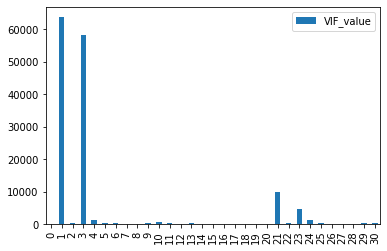

In [211]:
# Function that stores VIF values in a list, then combines the attributes and their corresponding VIF value in a Dataframe that's shown 

def calculate_vif(data):
    # Calculating the VIF values for each of the attributes and adding them to a list
    vif = []
    for i in range(data.shape[1]):
        vif.append(variance_inflation_factor(data.values, i))

    # Mapping each value to the corresponding attribute in a new dataframe to display    
    output = pd.DataFrame({'Attribute':data.columns, 'VIF_value': vif})
    output.plot(kind='bar')
    print(output)
    
calculate_vif(data)

In [212]:
# Looking at the data we can see that the values are much larger than 10 and that there are high levels of multicollinearity present.
# To deal with this, we can drop the attributes with high values

In [213]:
# Following my previous assumption, I can see that radius_mean has a high level of coorelation with other predictors in the dataset.
# To mitigate this, I will only use one predictor that gives information on the cell's size and drop the other ones.
# Eg. I will use radius_mean and drop cells to do with perimeter_mean and area_mean
# After this I will once again check the VIF to see if the values have changed.

# Dropping attributes related to perimeter and area
data.drop('perimeter_mean', axis=1, inplace=True)
data.drop('area_mean', axis=1, inplace=True)
data.drop('perimeter_se', axis=1, inplace=True)
data.drop('area_se', axis=1, inplace=True)
data.drop('perimeter_worst', axis=1, inplace=True)
data.drop('area_worst', axis=1, inplace=True)

In [214]:
# Quick .head() to see if the data has been dropped successfully

data.head(3)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


                  Attribute   VIF_value
0                 diagnosis    6.291851
1               radius_mean  448.609118
2              texture_mean  243.432998
3           smoothness_mean  365.277111
4          compactness_mean  112.239109
5            concavity_mean  139.715188
6       concave points_mean  139.880525
7             symmetry_mean  177.535649
8    fractal_dimension_mean  547.362898
9                 radius_se   16.370405
10               texture_se   23.311162
11            smoothness_se   25.198270
12           compactness_se   43.297235
13             concavity_se   30.415008
14        concave points_se   42.950419
15              symmetry_se   36.058083
16     fractal_dimension_se   25.218865
17             radius_worst  519.451441
18            texture_worst  331.298459
19         smoothness_worst  370.203361
20        compactness_worst  123.558433
21          concavity_worst   84.611273
22     concave points_worst  137.864126
23           symmetry_worst  212.959611


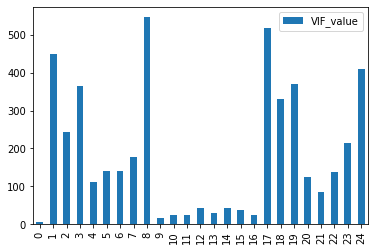

In [215]:
# Recheck the VIF values by calling the VIF function
calculate_vif(data)

<AxesSubplot:>

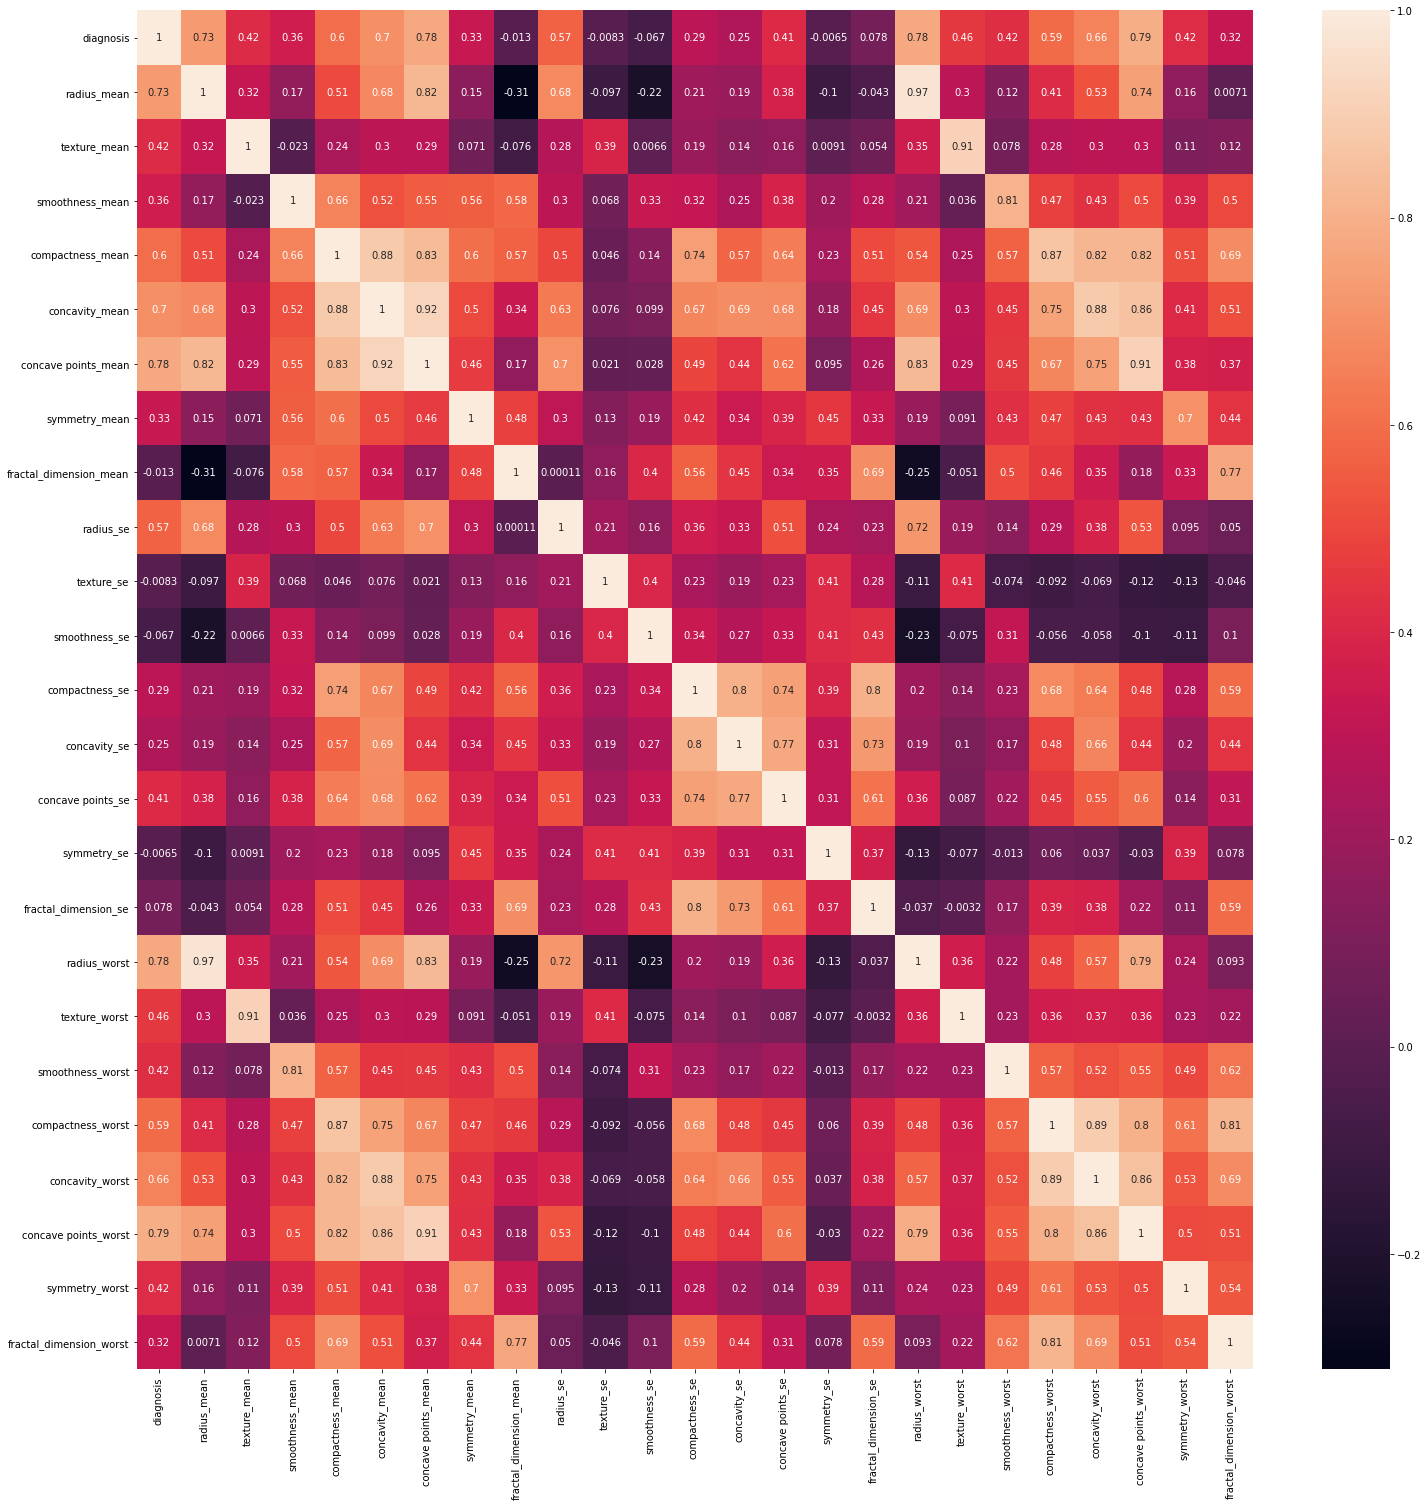

In [216]:
# As we can see radius_mean has decreased due to the removal of the attributes to do with the perimeter and area of the cell.
# However it is still extremely high and much greater than the value of 10.
# We can see what variables it is coorelated to strongly by looking at the heatmap and deciding which one to remove.

# Drawing the heatmap again to observe new values
# mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True)

In [217]:
# Looking at the heatmap again we can see that there is a clear coorealation between the mean value and it's corresponding worst value.
# ex. radius_mean will have high coorelation with radius_worst
# ex. texture_mean has high coorelation with texture_worst
# Therefore we can also remove the worst columns


# List of columns to drop
columns_to_drop = ['radius_worst',
                   'texture_worst',
                   'smoothness_worst',
                   'compactness_worst',
                   'concavity_worst',
                   'concave points_worst',
                   'symmetry_worst',
                   'fractal_dimension_worst']

# Dropping the columns
data.drop(columns_to_drop, axis=1, inplace=True)

# .head() to ensure the drop worked as intended
data.head(3)


,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


<AxesSubplot:>

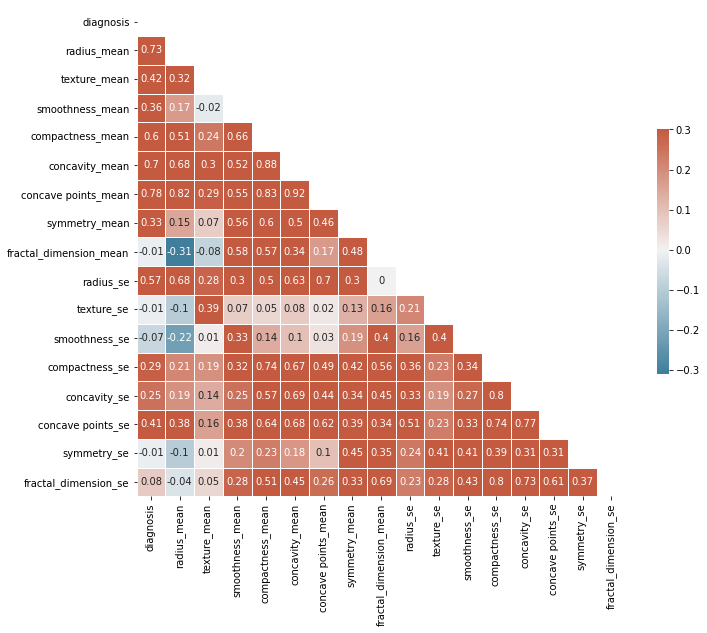

In [218]:
# Drawing the heatmap again to observe new values

# Compute the correlation matrix
corr = data.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [219]:
# Rechecking the heatmap, we can see that a lot of the coorelation has been removed resulting more independent attributes.
# However there is still some elements that can be considered further including:
# There is coorelation between concavity_mean and compactness_mean
# concave points_mean and concavity
# concave points_mean and compactness_mean
# If these three attributes are all describing the same thing then we can remove two of them and only keep one.
# If we were to do this, we would keep the one that has the highest coorelation with the diagnosis in the heatmap.
# Concave points_mean has a 0.78 with the diagnosis
# Compactness_mean has a 0.6 with the diagnosis
# Concavity_mean has a 0.7
# Therefore, keeping the highest we keep Concave points_mean and delete attributes to do with the other compactness and concavity


# Dropping attributes to do with the other compactness and concavity
columns_to_drop = ['concavity_mean',
        'concavity_se', 
        'compactness_mean', 
        'compactness_se']
data.drop(columns_to_drop, axis=1, inplace=True)
data.head()


# *****NOTE*****
# When tuning the model, I would definietly return here and experiment using Principle Component Analysis to retain the information from these attributes and combine them
# instead of dropping them from the table, to see whether that would yield a greater accuracy.
# In simple, reduce the amount of attributes in the model, whilst maintaining as much information as possible

,diagnosis,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.01587,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01340,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.02058,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.01867,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.01885,0.01756,0.005115


In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [221]:
# Split the data set into 75% training and 25% testing

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=5)


In [222]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

### **Deciding on a model type**

#### Using Binary Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

log_regression = LogisticRegression().fit(x_train, y_train)
training_acc = log_regression.score(x_train, y_train)
print("Training accuracy = ", training_acc)
prediction = log_regression.predict(x_test)

cm = confusion_matrix(y_test,prediction)
cm

Training accuracy =  0.9553990610328639


array([[86,  2],
       [ 4, 51]], dtype=int64)

Test accuracy =  0.958041958041958


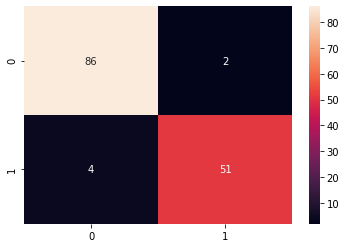

In [224]:
# Visual representation of the confusion matrix
sns.heatmap(cm, annot=True)


# Manually calculating accuracy using confusion matrix
# Accuracy = TP + TN / TP + FP + TN + FN
TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

acc = (TP + TN)/ (TP + FP + TN + FN)
print("Test accuracy = ", acc)

In [225]:
# Get classification report and accuracy from sklearn for the model
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.93      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [1]:
# Precision - how many correctly predicted cases actually turned out to be positive.
# Precision = TP / (TP + FP)

# Recall - how many positive cases we were able to predict correctly with our model.
# Recall = TP / (TP + FN)

# F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.
# However we need to be cautious when using F1-Score because we don’t know what our classifier is maximizing – precision or recall?
# It is important to use it with other metrics to find out more about this.

# https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/


### Next up KNN (07/22)